In [1]:
#Import required libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import syft as sy
import sys
import pdb 
import math
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import torchvision.models as models
from random import shuffle
from torch.utils.data import SubsetRandomSampler
import torchvision.models as models
import datetime

In [2]:
#original
data_transform = transforms.Compose([
        transforms.ToTensor(),                     
        transforms.Normalize(                     
            mean=[0.485, 0.456, 0.406],               
            std=[0.229, 0.224, 0.225]                  
        )])

#horizontal
data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ToTensor(),                     
        transforms.Normalize(                     
            mean=[0.485, 0.456, 0.406],               
            std=[0.229, 0.224, 0.225]                  
        )])

#####brighter
data_transform = transforms.Compose([
        transforms.ColorJitter(brightness=(1.3,1.3), contrast=0, saturation=0, hue=0),
        transforms.ToTensor(),                     
        transforms.Normalize(                     
            mean=[0.485, 0.456, 0.406],               
            std=[0.229, 0.224, 0.225]                  
        )])

#######darker
data_transform = transforms.Compose([
        transforms.ColorJitter(brightness=(0.7,0.7), contrast=0, saturation=0, hue=0),
        transforms.ToTensor(),                     
        transforms.Normalize(                     
            mean=[0.485, 0.456, 0.406],               
            std=[0.229, 0.224, 0.225]                  
        )])

#######darker_horizontal
data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ColorJitter(brightness=(0.7,0.7), contrast=0, saturation=0, hue=0),
        transforms.ToTensor(),                     
        transforms.Normalize(                     
            mean=[0.485, 0.456, 0.406],               
            std=[0.229, 0.224, 0.225]                  
        )])

#######brighter_horizontal
data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ColorJitter(brightness=(1.3,1.3), contrast=0, saturation=0, hue=0),
        transforms.ToTensor(),                     
        transforms.Normalize(                     
            mean=[0.485, 0.456, 0.406],               
            std=[0.229, 0.224, 0.225]                  
        )])

#######veryBright
data_transform = transforms.Compose([
        transforms.ColorJitter(brightness=(1.6,1.6), contrast=0, saturation=0, hue=0),
        transforms.ToTensor(),                     
        transforms.Normalize(                     
            mean=[0.485, 0.456, 0.406],               
            std=[0.229, 0.224, 0.225]                  
        )])

#######veryDark
data_transform = transforms.Compose([
        transforms.ColorJitter(brightness=(0.4,0.4), contrast=0, saturation=0, hue=0),
        transforms.ToTensor(),                     
        transforms.Normalize(                     
            mean=[0.485, 0.456, 0.406],               
            std=[0.229, 0.224, 0.225]                  
        )])

######veryBright_horizontal
data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ColorJitter(brightness=(1.6,1.6), contrast=0, saturation=0, hue=0),
        transforms.ToTensor(),                     
        transforms.Normalize(                     
            mean=[0.485, 0.456, 0.406],               
            std=[0.229, 0.224, 0.225]                  
        )])

#######veryDark_horizontal
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.ColorJitter(brightness=(0.4,0.4), contrast=0, saturation=0, hue=0),
    transforms.ToTensor(),                     
    transforms.Normalize(                     
        mean=[0.485, 0.456, 0.406],               
        std=[0.229, 0.224, 0.225]                  
    )])

#benign data
yalefaces = datasets.ImageFolder(root = 
                             '/Users/floriannuding/Desktop/yale/original_test',
                             transform=data_transform)

In [3]:
dataset_loader_train = torch.utils.data.DataLoader(yalefaces, batch_size=1)

In [4]:
def getImage(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    return inp

/Users/floriannuding/Desktop/yale_new/original_test/001/veryDark_horizontal_0.png
/Users/floriannuding/Desktop/yale_new/original_test/002/veryDark_horizontal_1.png
/Users/floriannuding/Desktop/yale_new/original_test/003/veryDark_horizontal_2.png
/Users/floriannuding/Desktop/yale_new/original_test/004/veryDark_horizontal_3.png
/Users/floriannuding/Desktop/yale_new/original_test/005/veryDark_horizontal_4.png
/Users/floriannuding/Desktop/yale_new/original_test/006/veryDark_horizontal_5.png
/Users/floriannuding/Desktop/yale_new/original_test/007/veryDark_horizontal_6.png
/Users/floriannuding/Desktop/yale_new/original_test/009/veryDark_horizontal_7.png
/Users/floriannuding/Desktop/yale_new/original_test/010/veryDark_horizontal_8.png
/Users/floriannuding/Desktop/yale_new/original_test/011/veryDark_horizontal_9.png
/Users/floriannuding/Desktop/yale_new/original_test/012/veryDark_horizontal_10.png
/Users/floriannuding/Desktop/yale_new/original_test/014/veryDark_horizontal_11.png
/Users/florian

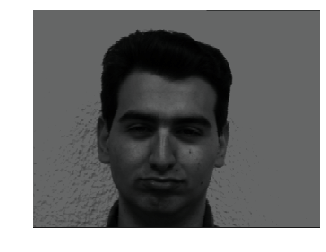

In [5]:
for index, (inputs, classes) in enumerate(iter(dataset_loader_train)):
    out = torchvision.utils.make_grid(inputs)
    image = getImage(out)
    
    plt.imshow(image, interpolation='nearest')
    plt.axis("off")   # turns off axes
   
    #fix class path
    classNumber = classes.numpy()[0]
    if(classes.numpy()[0] == 0):
        classNumber = 1
    if(classes.numpy()[0] == 1):
        classNumber = 2
    if(classes.numpy()[0] == 2):
        classNumber = 3
    if(classes.numpy()[0] == 3):
        classNumber = 4
    if(classes.numpy()[0] == 4):
        classNumber = 5
    if(classes.numpy()[0] == 5):
        classNumber = 6
    if(classes.numpy()[0] == 6):
        classNumber = 7
    if(classes.numpy()[0] == 7):
        classNumber = 9
    if(classes.numpy()[0] == 8):
        classNumber = 10
    if(classes.numpy()[0] == 9):
        classNumber = 11
    if(classes.numpy()[0] == 10):
        classNumber = 12
    if(classes.numpy()[0] == 11):
        classNumber = 14
    if(classes.numpy()[0] == 12):
        classNumber = 15
        
    path = '/Users/floriannuding/Desktop/yale_new/original_test/0'
    path += (('0' + str(classNumber)) if classNumber < 10 else (str(classNumber))) + '/'
       
    filename = 'veryDark_horizontal_' + str(index) + ".png"
    total = path + filename
    print(total)
    plt.savefig(total,bbox_inches='tight', pad_inches = 0)